In [1]:
!pip install -q retinaface

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
img_path = 'database/Aragaki_Yui/Aragaki_Yui.png'
imgBGR = cv2.imread(img_path, cv2.IMREAD_COLOR).astype('float32')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

In [4]:
# load RetinaFace detector
from retinaface import RetinaFace
# init with normal accuracy option
detector = RetinaFace(quality="normal")
# detect faces in the image
facePositions = detector.predict(imgRGB)
facePosition = facePositions[0]
facePosition

model[normal quality] init ..
model success !


{'x1': 79,
 'y1': 26,
 'x2': 150,
 'y2': 120,
 'left_eye': (104, 62),
 'right_eye': (138, 64),
 'nose': (124, 82),
 'left_lip': (102, 92),
 'right_lip': (134, 94)}

In [5]:
x1, y1 = facePosition.pop('x1'), facePosition.pop('y1')
x2, y2 = facePosition.pop('x2'), facePosition.pop('y2')
landmark = list(facePosition.values())

(-0.5, 190.5, 167.5, -0.5)

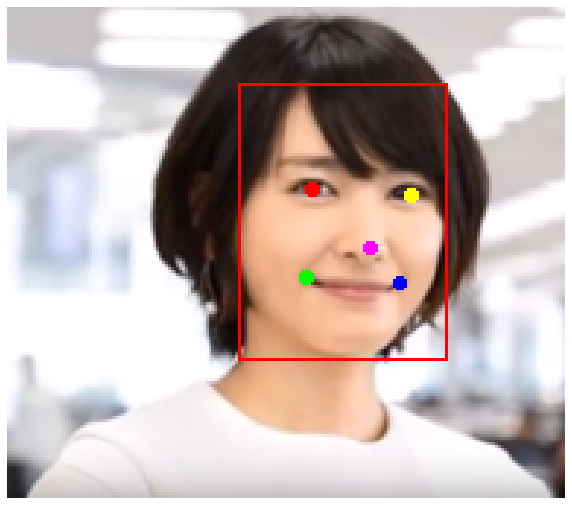

In [6]:
cv2.rectangle(imgRGB, (x1, y1), (x2, y2), (255, 0, 0), 1)
cv2.circle(imgRGB, (landmark[0][0], landmark[0][1]), 1, (255, 0, 0), 2)
cv2.circle(imgRGB, (landmark[1][0], landmark[1][1]), 1, (255, 255, 0), 2)
cv2.circle(imgRGB, (landmark[2][0], landmark[2][1]), 1, (255, 0, 255), 2)
cv2.circle(imgRGB, (landmark[3][0], landmark[3][1]), 1, (0, 255, 0), 2)
cv2.circle(imgRGB, (landmark[4][0], landmark[4][1]), 1, (0, 0, 255), 2)
plt.figure(figsize=(10, 15))
plt.imshow(imgRGB/255)
plt.axis('off')